<a href="https://colab.research.google.com/github/mokuda2/hacklytics/blob/main/CryptoFinCast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

# Welcome to CryptoFinCast! 

In this notebook we create a model to forcast cryptocurrency stock prices in order to gain profits.

In [2]:
# import the necessary libraries
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
#  import tensorflow libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import os 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
# getting latest data
def get_data(stocks, start, end):
    df = pdr.get_data_yahoo(stocks, start, end)
    return df


In [5]:
crypto_tickers = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'DOGE-USD']

In [6]:
def LSTM_model(X_train):
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

[*********************100%***********************]  1 of 1 completed
Data Preprocessing for BTC-USD Stocks
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
               

90/90 [==============================] - 15s 92ms/step - loss: 0.0066
Epoch 2/25
90/90 [==============================] - ETA: 0s - loss: 0.0021

90/90 [==============================] - 9s 106ms/step - loss: 0.0021
Epoch 3/25
90/90 [==============================] - ETA: 0s - loss: 0.0021

90/90 [==============================] - 10s 106ms/step - loss: 0.0021
Epoch 4/25
90/90 [==============================] - ETA: 0s - loss: 0.0023

90/90 [==============================] - 11s 121ms/step - loss: 0.0023
Epoch 5/25
90/90 [==============================] - ETA: 0s - loss: 0.0017

90/90 [==============================] - 11s 125ms/step - loss: 0.0017
Epoch 6/25
90/90 [==============================] - ETA: 0s - loss: 0.0019

90/90 [==============================] - 9s 101ms/step - loss: 0.0019
Epoch 7/25
90/90 [==============================] - ETA: 0s - loss: 0.0015

90/90 [==============================] - 10s 112ms/step - loss: 0.0015
Epoch 8/25
90/90 [==============================] - ETA: 0s - loss: 0.0013

90/90 [==============================] - 10s 107ms/step - loss: 0.0013
Epoch 9/25
90/90 [==============================] - ETA: 0s - loss: 0.0012

90/90 [==============================] - 8s 94ms/step - loss: 0.0012
Epoch 10/25
90/90 [==============================] - ETA: 0s - loss: 0.0014

90/90 [==============================] - 12s 138ms/step - loss: 0.0014
Epoch 11/25
90/90 [==============================] - ETA: 0s - loss: 0.0013

90/90 [==============================] - 10s 114ms/step - loss: 0.0013
Epoch 12/25
90/90 [==============================] - ETA: 0s - loss: 0.0012

90/90 [==============================] - 10s 108ms/step - loss: 0.0012
Epoch 13/25
90/90 [==============================] - ETA: 0s - loss: 0.0012

90/90 [==============================] - 11s 125ms/step - loss: 0.0012
Epoch 14/25
90/90 [==============================] - ETA: 0s - loss: 0.0012

90/90 [==============================] - 9s 95ms/step - loss: 0.0012
Epoch 15/25
90/90 [==============================] - ETA: 0s - loss: 0.0012

90/90 [==============================] - 10s 108ms/step - loss: 0.0012
Epoch 16/25
90/90 [==============================] - ETA: 0s - loss: 0.0010

90/90 [==============================] - 10s 108ms/step - loss: 0.0010
Epoch 17/25
90/90 [==============================] - ETA: 0s - loss: 0.0012

90/90 [==============================] - 10s 108ms/step - loss: 0.0012
Epoch 18/25
90/90 [==============================] - ETA: 0s - loss: 0.0012

90/90 [==============================] - 9s 94ms/step - loss: 0.0012
Epoch 19/25
90/90 [==============================] - ETA: 0s - loss: 0.0010

90/90 [==============================] - 10s 108ms/step - loss: 0.0010
Epoch 20/25
90/90 [==============================] - ETA: 0s - loss: 9.3379e-04

90/90 [==============================] - 10s 108ms/step - loss: 9.3379e-04
Epoch 21/25
90/90 [==============================] - ETA: 0s - loss: 9.2912e-04

90/90 [==============================] - 9s 98ms/step - loss: 9.2912e-04
Epoch 22/25
90/90 [==============================] - ETA: 0s - loss: 0.0011

90/90 [==============================] - 10s 112ms/step - loss: 0.0011
Epoch 23/25
90/90 [==============================] - ETA: 0s - loss: 9.7146e-04

90/90 [==============================] - 10s 109ms/step - loss: 9.7146e-04
Epoch 24/25
90/90 [==============================] - ETA: 0s - loss: 8.7297e-04

90/90 [==============================] - 10s 110ms/step - loss: 8.7297e-04
Epoch 25/25
90/90 [==============================] - ETA: 0s - loss: 8.6577e-04

90/90 [==============================] - 10s 107ms/step - loss: 8.6577e-04
[*********************100%***********************]  1 of 1 completed
2/2 [==============================] - 1s 21ms/step
Directory 'lstm_saved_model' created


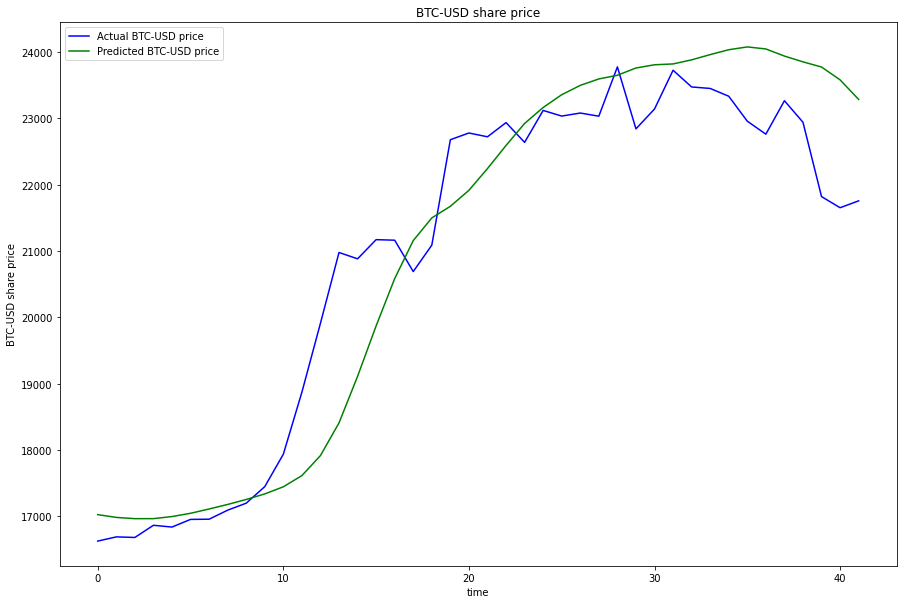

1/1 [==============================] - 1s 1s/step
prediction: [[22970.049]]
[*********************100%***********************]  1 of 1 completed
Data Preprocessing for ETH-USD Stocks
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dr

57/57 [==============================] - 12s 97ms/step - loss: 0.0128
Epoch 2/25
57/57 [==============================] - ETA: 0s - loss: 0.0034

57/57 [==============================] - 7s 119ms/step - loss: 0.0034
Epoch 3/25
57/57 [==============================] - ETA: 0s - loss: 0.0034

57/57 [==============================] - 5s 96ms/step - loss: 0.0034
Epoch 4/25
57/57 [==============================] - ETA: 0s - loss: 0.0032

57/57 [==============================] - 7s 119ms/step - loss: 0.0032
Epoch 5/25
57/57 [==============================] - ETA: 0s - loss: 0.0029

57/57 [==============================] - 5s 95ms/step - loss: 0.0029
Epoch 6/25
57/57 [==============================] - ETA: 0s - loss: 0.0027

57/57 [==============================] - 7s 116ms/step - loss: 0.0027
Epoch 7/25
57/57 [==============================] - ETA: 0s - loss: 0.0027

57/57 [==============================] - 6s 96ms/step - loss: 0.0027
Epoch 8/25
57/57 [==============================] - ETA: 0s - loss: 0.0023

57/57 [==============================] - 6s 105ms/step - loss: 0.0023
Epoch 9/25
57/57 [==============================] - ETA: 0s - loss: 0.0022

57/57 [==============================] - 6s 107ms/step - loss: 0.0022
Epoch 10/25
57/57 [==============================] - ETA: 0s - loss: 0.0023

57/57 [==============================] - 6s 100ms/step - loss: 0.0023
Epoch 11/25
57/57 [==============================] - ETA: 0s - loss: 0.0020

57/57 [==============================] - 7s 116ms/step - loss: 0.0020
Epoch 12/25
57/57 [==============================] - ETA: 0s - loss: 0.0019

57/57 [==============================] - 5s 96ms/step - loss: 0.0019
Epoch 13/25
57/57 [==============================] - ETA: 0s - loss: 0.0019

57/57 [==============================] - 7s 121ms/step - loss: 0.0019
Epoch 14/25
57/57 [==============================] - ETA: 0s - loss: 0.0017

57/57 [==============================] - 5s 96ms/step - loss: 0.0017
Epoch 15/25
57/57 [==============================] - ETA: 0s - loss: 0.0018

57/57 [==============================] - 7s 121ms/step - loss: 0.0018
Epoch 16/25
57/57 [==============================] - ETA: 0s - loss: 0.0020

57/57 [==============================] - 6s 98ms/step - loss: 0.0020
Epoch 17/25
57/57 [==============================] - ETA: 0s - loss: 0.0019

57/57 [==============================] - 7s 118ms/step - loss: 0.0019
Epoch 18/25
57/57 [==============================] - ETA: 0s - loss: 0.0017

57/57 [==============================] - 6s 97ms/step - loss: 0.0017
Epoch 19/25
57/57 [==============================] - ETA: 0s - loss: 0.0016

57/57 [==============================] - 7s 119ms/step - loss: 0.0016
Epoch 20/25
57/57 [==============================] - ETA: 0s - loss: 0.0018

57/57 [==============================] - 6s 99ms/step - loss: 0.0018
Epoch 21/25
57/57 [==============================] - ETA: 0s - loss: 0.0015

57/57 [==============================] - 7s 118ms/step - loss: 0.0015
Epoch 22/25
57/57 [==============================] - ETA: 0s - loss: 0.0017

57/57 [==============================] - 6s 99ms/step - loss: 0.0017
Epoch 23/25
57/57 [==============================] - ETA: 0s - loss: 0.0017

57/57 [==============================] - 7s 119ms/step - loss: 0.0017
Epoch 24/25
57/57 [==============================] - ETA: 0s - loss: 0.0015

57/57 [==============================] - 5s 96ms/step - loss: 0.0015
Epoch 25/25
57/57 [==============================] - ETA: 0s - loss: 0.0014

57/57 [==============================] - 6s 111ms/step - loss: 0.0014
[*********************100%***********************]  1 of 1 completed
2/2 [==============================] - 1s 25ms/step
Directory 'lstm_saved_model' created


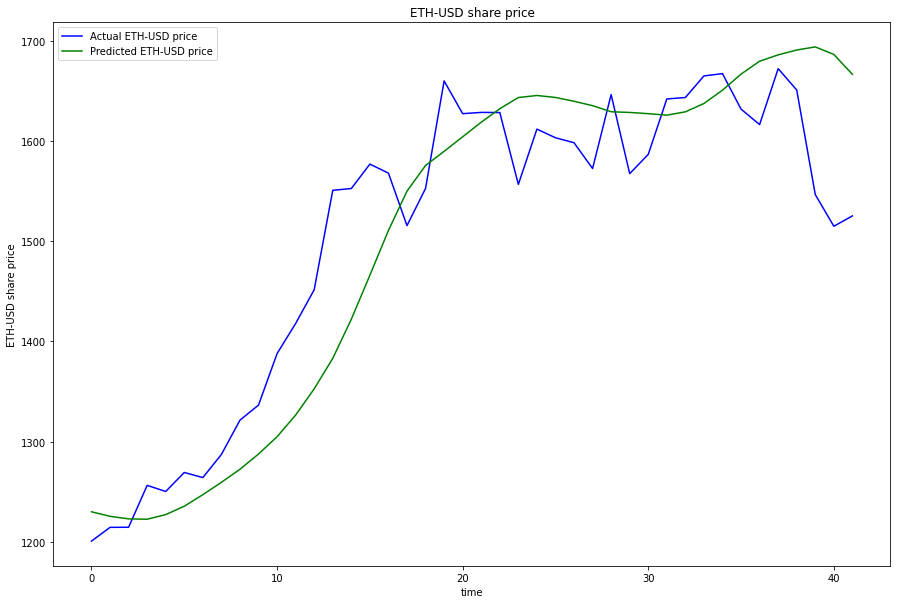

1/1 [==============================] - 2s 2s/step
prediction: [[1639.5481]]
[*********************100%***********************]  1 of 1 completed
Data Preprocessing for XRP-USD Stocks
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dr

57/57 [==============================] - 12s 97ms/step - loss: 0.0031
Epoch 2/25
57/57 [==============================] - ETA: 0s - loss: 0.0016

57/57 [==============================] - 7s 117ms/step - loss: 0.0016
Epoch 3/25
57/57 [==============================] - ETA: 0s - loss: 0.0014

57/57 [==============================] - 6s 101ms/step - loss: 0.0014
Epoch 4/25
57/57 [==============================] - ETA: 0s - loss: 0.0011

57/57 [==============================] - 6s 109ms/step - loss: 0.0011
Epoch 5/25
57/57 [==============================] - ETA: 0s - loss: 0.0010

57/57 [==============================] - 6s 109ms/step - loss: 0.0010
Epoch 6/25
57/57 [==============================] - ETA: 0s - loss: 8.5781e-04

57/57 [==============================] - 6s 102ms/step - loss: 8.5781e-04
Epoch 7/25
57/57 [==============================] - ETA: 0s - loss: 8.8751e-04

57/57 [==============================] - 7s 118ms/step - loss: 8.8751e-04
Epoch 8/25
57/57 [==============================] - ETA: 0s - loss: 7.6884e-04

57/57 [==============================] - 6s 100ms/step - loss: 7.6884e-04
Epoch 9/25
57/57 [==============================] - ETA: 0s - loss: 8.4531e-04

57/57 [==============================] - 7s 121ms/step - loss: 8.4531e-04
Epoch 10/25
57/57 [==============================] - ETA: 0s - loss: 6.8512e-04

57/57 [==============================] - 6s 100ms/step - loss: 6.8512e-04
Epoch 11/25
57/57 [==============================] - ETA: 0s - loss: 6.2849e-04

57/57 [==============================] - 7s 119ms/step - loss: 6.2849e-04
Epoch 12/25
57/57 [==============================] - ETA: 0s - loss: 6.8479e-04

57/57 [==============================] - 5s 96ms/step - loss: 6.8479e-04
Epoch 13/25
57/57 [==============================] - ETA: 0s - loss: 6.5593e-04

57/57 [==============================] - 7s 119ms/step - loss: 6.5593e-04
Epoch 14/25
57/57 [==============================] - ETA: 0s - loss: 6.2222e-04

57/57 [==============================] - 5s 96ms/step - loss: 6.2222e-04
Epoch 15/25
57/57 [==============================] - ETA: 0s - loss: 5.5556e-04

57/57 [==============================] - 7s 120ms/step - loss: 5.5556e-04
Epoch 16/25
57/57 [==============================] - ETA: 0s - loss: 6.0664e-04

57/57 [==============================] - 6s 99ms/step - loss: 6.0664e-04
Epoch 17/25
57/57 [==============================] - ETA: 0s - loss: 5.3297e-04

57/57 [==============================] - 7s 121ms/step - loss: 5.3297e-04
Epoch 18/25
57/57 [==============================] - ETA: 0s - loss: 5.3663e-04

57/57 [==============================] - 6s 99ms/step - loss: 5.3663e-04
Epoch 19/25
57/57 [==============================] - ETA: 0s - loss: 5.7515e-04

57/57 [==============================] - 7s 121ms/step - loss: 5.7515e-04
Epoch 20/25
57/57 [==============================] - ETA: 0s - loss: 5.3405e-04

57/57 [==============================] - 6s 97ms/step - loss: 5.3405e-04
Epoch 21/25
57/57 [==============================] - ETA: 0s - loss: 5.5769e-04

57/57 [==============================] - 7s 120ms/step - loss: 5.5769e-04
Epoch 22/25
57/57 [==============================] - ETA: 0s - loss: 5.2435e-04

57/57 [==============================] - 6s 99ms/step - loss: 5.2435e-04
Epoch 23/25
57/57 [==============================] - ETA: 0s - loss: 4.3101e-04

57/57 [==============================] - 7s 119ms/step - loss: 4.3101e-04
Epoch 24/25
57/57 [==============================] - ETA: 0s - loss: 5.2300e-04

57/57 [==============================] - 6s 104ms/step - loss: 5.2300e-04
Epoch 25/25
57/57 [==============================] - ETA: 0s - loss: 4.9849e-04

57/57 [==============================] - 6s 113ms/step - loss: 4.9849e-04
[*********************100%***********************]  1 of 1 completed


2/2 [==============================] - 2s 36ms/step
Directory 'lstm_saved_model' created


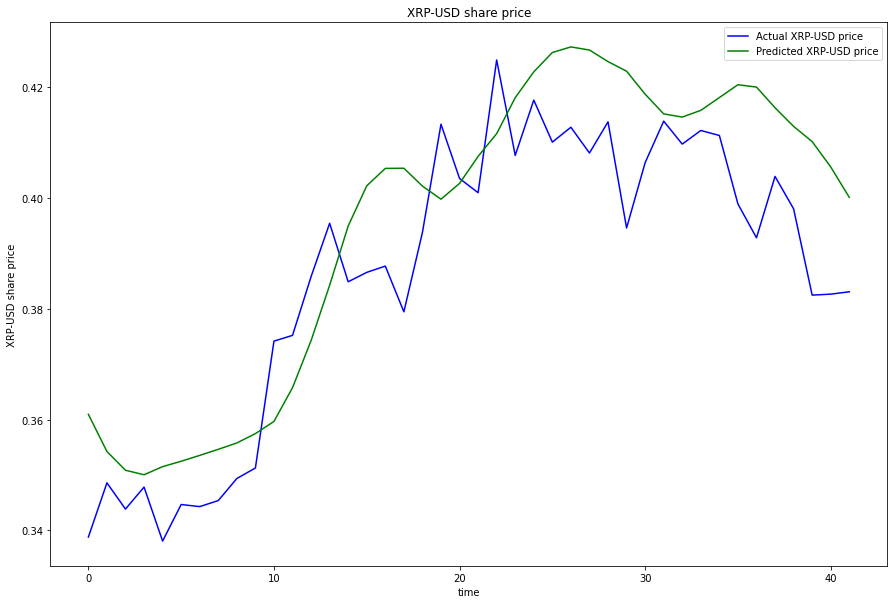

1/1 [==============================] - 1s 1s/step
prediction: [[0.3952906]]
[*********************100%***********************]  1 of 1 completed
Data Preprocessing for DOGE-USD Stocks
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 d

57/57 [==============================] - 12s 120ms/step - loss: 0.0044
Epoch 2/25
57/57 [==============================] - ETA: 0s - loss: 0.0025

57/57 [==============================] - 6s 100ms/step - loss: 0.0025
Epoch 3/25
57/57 [==============================] - ETA: 0s - loss: 0.0019

57/57 [==============================] - 7s 123ms/step - loss: 0.0019
Epoch 4/25
57/57 [==============================] - ETA: 0s - loss: 0.0018

57/57 [==============================] - 6s 99ms/step - loss: 0.0018
Epoch 5/25
57/57 [==============================] - ETA: 0s - loss: 0.0018

57/57 [==============================] - 7s 121ms/step - loss: 0.0018
Epoch 6/25
57/57 [==============================] - ETA: 0s - loss: 0.0017

57/57 [==============================] - 6s 99ms/step - loss: 0.0017
Epoch 7/25
57/57 [==============================] - ETA: 0s - loss: 0.0015

57/57 [==============================] - 7s 121ms/step - loss: 0.0015
Epoch 8/25
57/57 [==============================] - ETA: 0s - loss: 0.0014

57/57 [==============================] - 6s 100ms/step - loss: 0.0014
Epoch 9/25
57/57 [==============================] - ETA: 0s - loss: 0.0014

57/57 [==============================] - 7s 121ms/step - loss: 0.0014
Epoch 10/25
57/57 [==============================] - ETA: 0s - loss: 0.0015

57/57 [==============================] - 6s 100ms/step - loss: 0.0015
Epoch 11/25
57/57 [==============================] - ETA: 0s - loss: 0.0013

57/57 [==============================] - 7s 115ms/step - loss: 0.0013
Epoch 12/25
57/57 [==============================] - ETA: 0s - loss: 0.0012

57/57 [==============================] - 6s 103ms/step - loss: 0.0012
Epoch 13/25
57/57 [==============================] - ETA: 0s - loss: 0.0011

57/57 [==============================] - 6s 108ms/step - loss: 0.0011
Epoch 14/25
57/57 [==============================] - ETA: 0s - loss: 0.0011

57/57 [==============================] - 6s 113ms/step - loss: 0.0011
Epoch 15/25
57/57 [==============================] - ETA: 0s - loss: 0.0011

57/57 [==============================] - 6s 103ms/step - loss: 0.0011
Epoch 16/25
57/57 [==============================] - ETA: 0s - loss: 0.0011

57/57 [==============================] - 7s 116ms/step - loss: 0.0011
Epoch 17/25
57/57 [==============================] - ETA: 0s - loss: 0.0011

57/57 [==============================] - 6s 99ms/step - loss: 0.0011
Epoch 18/25
57/57 [==============================] - ETA: 0s - loss: 8.3484e-04

57/57 [==============================] - 7s 123ms/step - loss: 8.3484e-04
Epoch 19/25
57/57 [==============================] - ETA: 0s - loss: 9.4866e-04

57/57 [==============================] - 6s 100ms/step - loss: 9.4866e-04
Epoch 20/25
57/57 [==============================] - ETA: 0s - loss: 9.2854e-04

57/57 [==============================] - 7s 122ms/step - loss: 9.2854e-04
Epoch 21/25
57/57 [==============================] - ETA: 0s - loss: 9.0156e-04

57/57 [==============================] - 6s 99ms/step - loss: 9.0156e-04
Epoch 22/25
57/57 [==============================] - ETA: 0s - loss: 8.5422e-04

57/57 [==============================] - 7s 124ms/step - loss: 8.5422e-04
Epoch 23/25
57/57 [==============================] - ETA: 0s - loss: 9.7505e-04

57/57 [==============================] - 6s 100ms/step - loss: 9.7505e-04
Epoch 24/25
57/57 [==============================] - ETA: 0s - loss: 8.2068e-04

57/57 [==============================] - 7s 122ms/step - loss: 8.2068e-04
Epoch 25/25
57/57 [==============================] - ETA: 0s - loss: 7.8458e-04

57/57 [==============================] - 6s 101ms/step - loss: 7.8458e-04
[*********************100%***********************]  1 of 1 completed
2/2 [==============================] - 1s 25ms/step
Directory 'lstm_saved_model' created


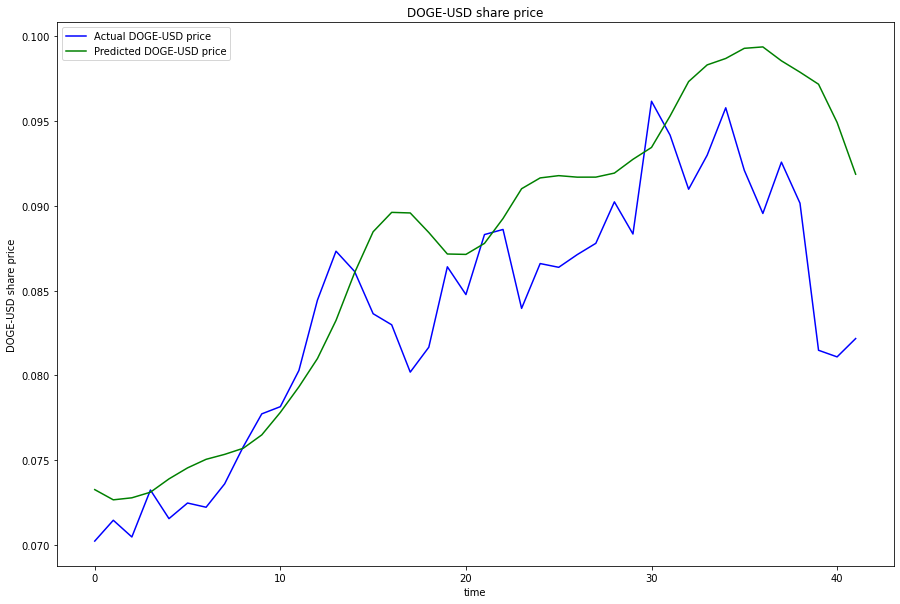

1/1 [==============================] - 1s 1s/step
prediction: [[0.08923814]]


In [8]:
# We try with another model to see if we get better predictions

for tick in crypto_tickers:
  prediction_days = 60
  scaler = MinMaxScaler(feature_range=(0,1))
  START_DATE = dt.datetime(2015,1,1)
  END_DATE = dt.datetime(2023,1,1)
  df = get_data(tick, START_DATE, END_DATE)
  scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))
  x_train = []
  y_train = []

  for x in range(prediction_days, len(scaled_data)):
      x_train.append(scaled_data[x - prediction_days:x, 0])
      y_train.append(scaled_data[x, 0])
  print(f"Data Preprocessing for {tick} Stocks")
  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  lstm = LSTM_model(x_train)
  lstm.summary()
  lstm.compile(optimizer='adam', 
                loss='mean_squared_error')
  checkpointer = ModelCheckpoint(filepath = tick+'_weights_best.hdf5', 
                               verbose = 2, 
                               save_best_only = True)

  lstm.fit(x_train, 
            y_train, 
            epochs=25, 
            batch_size = 32,
            callbacks = [checkpointer])
  END_DATE = dt.datetime(2023,1,1)

  START_DATE_TEST = END_DATE
  test_data = get_data(tick, START_DATE_TEST,dt.datetime.now())
  actual_prices = test_data['Close'].values

  total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

  lstm_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
  lstm_inputs = lstm_inputs.reshape(-1,1)
  lstm_inputs = scaler.transform(lstm_inputs)
  x_test = []
  for x in range(prediction_days, len(lstm_inputs)):
      x_test.append(lstm_inputs[x-prediction_days:x, 0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

  predicted_prices = lstm.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)
    # save model 
  directory = "lstm_saved_model"
  parent_dir = "/content"
  path = os.path.join(parent_dir, directory)
  os.makedirs(path, exist_ok=True) 
  print("Directory '% s' created" % directory) 

  lstm.save('lstm_saved_model/'+tick+'_model')
  plt.figure(figsize=(15,10))
  plt.plot(actual_prices, color='blue', label=f"Actual {tick} price")
  plt.plot(predicted_prices, color= 'green', label=f"Predicted {tick} price")
  plt.title(f"{tick} share price")
  plt.xlabel("time")
  plt.ylabel(f"{tick} share price")
  plt.legend()
  plt.show()
  # predicting next day
  real_data = [lstm_inputs[len(lstm_inputs)+1 - prediction_days:len(lstm_inputs+1),0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
  prediction = lstm.predict(real_data)
  prediction = scaler.inverse_transform(prediction)
  print(f"prediction: {prediction}")


In [9]:
!zip -r crypto_lstm_saved_model.zip lstm_saved_model/

  adding: lstm_saved_model/ (stored 0%)
  adding: lstm_saved_model/XRP-USD_model/ (stored 0%)
  adding: lstm_saved_model/XRP-USD_model/keras_metadata.pb (deflated 92%)
  adding: lstm_saved_model/XRP-USD_model/variables/ (stored 0%)
  adding: lstm_saved_model/XRP-USD_model/variables/variables.index (deflated 64%)
  adding: lstm_saved_model/XRP-USD_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: lstm_saved_model/XRP-USD_model/assets/ (stored 0%)
  adding: lstm_saved_model/XRP-USD_model/fingerprint.pb (stored 0%)
  adding: lstm_saved_model/XRP-USD_model/saved_model.pb (deflated 91%)
  adding: lstm_saved_model/ETH-USD_model/ (stored 0%)
  adding: lstm_saved_model/ETH-USD_model/keras_metadata.pb (deflated 92%)
  adding: lstm_saved_model/ETH-USD_model/variables/ (stored 0%)
  adding: lstm_saved_model/ETH-USD_model/variables/variables.index (deflated 64%)
  adding: lstm_saved_model/ETH-USD_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: lstm_saved_m

In [10]:
from google.colab import files
files.download("/content/crypto_lstm_saved_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>